In [1]:
#importing important packages
import pandas as pd
import time
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
#importing the creditcard csv file
creditdf = pd.read_csv("creditcard.csv")

## Part I: Exploratory Analysis and Feature Engineering

In [2]:

Fraudulent = creditdf[creditdf["Class"] == 1]
Non_Fraudulent = creditdf[creditdf["Class"] ==0]

In [3]:
np.mean(Fraudulent["Time"])

80746.80691056911

In [4]:
np.mean(Fraudulent["Amount"])

122.21132113821133

In [5]:
np.median(Fraudulent["Time"])

75568.5

In [6]:
np.median(Fraudulent["Amount"])

9.25

In [7]:
np.mean(Non_Fraudulent["Time"])

94838.20225805884

In [8]:
np.mean(Non_Fraudulent["Amount"])

88.29102242225574

In [9]:
np.median(Non_Fraudulent["Time"])

84711.0

In [10]:
np.median(Non_Fraudulent["Amount"])

22.0

In [11]:
listnames = []
for item in range(1,29):
    listname = "V" + str(item)
    listnames.append(listname)

means_fraud = []    
medians_fraud = []

means_non = []
medians_non = []

for v in listnames:
    means_fraud.append([np.mean(Fraudulent[v]), v])
    medians_fraud.append([np.median(Fraudulent[v]), v])
    means_non.append([np.mean(Non_Fraudulent[v]),v])
    medians_non.append([np.median(Non_Fraudulent[v]),v])
  

In [87]:
#means_fraud

In [13]:
#means_non

In [14]:
#medians_non

In [15]:
#medians_fraud

In [16]:
difference_Mean_list = []
for i in range(len(means_fraud)):
    differences = abs(means_fraud[i][0]) - abs(means_non[i][0])
    difference_Mean_list.append([differences, means_fraud[i][1]])
    

In [17]:
difference_Mean_list.sort()

In [89]:
#difference_Mean_list

In [19]:
col_list = ['Amount', 'Time', 'V3', 'V10', 'V12', 'V14', 'V17']

In [20]:
Mean_df = pd.DataFrame({"Amount":[np.mean(Fraudulent[col_list[0]]), np.mean(Non_Fraudulent[col_list[0]]) ],
                               "Time": [np.mean(Fraudulent[col_list[1]]), np.mean(Non_Fraudulent[col_list[1]]) ],
                               "V3": [np.mean(Fraudulent[col_list[2]]), np.mean(Non_Fraudulent[col_list[2]]) ],
                               "V10": [np.mean(Fraudulent[col_list[3]]), np.mean(Non_Fraudulent[col_list[3]]) ],
                               "V12": [np.mean(Fraudulent[col_list[4]]), np.mean(Non_Fraudulent[col_list[4]]) ],
                               "V14": [np.mean(Fraudulent[col_list[5]]), np.mean(Non_Fraudulent[col_list[5]]) ],
                               "V17": [np.mean(Fraudulent[col_list[6]]), np.mean(Non_Fraudulent[col_list[6]]) ],
})
Mean_df

,Amount,Time,V3,V10,V12,V14,V17
0,122.211321,80746.806911,-7.033281,-5.676883,-6.259393,-6.971723,-6.665836
1,88.291022,94838.202258,0.012171,0.009824,0.010832,0.012064,0.011535


In [21]:
difference_Median_list = []
for i in range(len(medians_fraud)):
    differences = abs(medians_fraud[i][0]) - abs(medians_non[i][0])
    difference_Median_list.append([differences, medians_fraud[i][1]])
    

In [22]:
difference_Median_list.sort()
#difference_Median_list

In [23]:
Median_df = pd.DataFrame({"Amount":[np.median(Fraudulent[col_list[0]]), np.median(Non_Fraudulent[col_list[0]]) ],
                               "Time": [np.median(Fraudulent[col_list[1]]), np.median(Non_Fraudulent[col_list[1]]) ],
                               "V3": [np.median(Fraudulent[col_list[2]]), np.median(Non_Fraudulent[col_list[2]]) ],
                               "V10": [np.median(Fraudulent[col_list[3]]), np.median(Non_Fraudulent[col_list[3]]) ],
                               "V12": [np.median(Fraudulent[col_list[4]]), np.median(Non_Fraudulent[col_list[4]]) ],
                               "V14": [np.median(Fraudulent[col_list[5]]), np.median(Non_Fraudulent[col_list[5]]) ],
                               "V17": [np.median(Fraudulent[col_list[6]]), np.median(Non_Fraudulent[col_list[6]]) ],
})
Median_df

,Amount,Time,V3,V10,V12,V14,V17
0,9.25,75568.5,-5.075257,-4.578825,-5.502530,-6.729720,-5.302949
1,22.00,84711.0,0.182158,-0.091872,0.141679,0.051947,-0.064833


In [24]:
normalize = {}

for i in range(len(creditdf.columns)):
    normalize[creditdf.columns[i]] = preprocessing.minmax_scale(creditdf[creditdf.columns[i]], feature_range=(0, 1), axis=0, copy=True)

In [25]:
column_names = []
for item in list(normalize.keys()):
    column_names.append( item + "_Normalize")
    

In [26]:
for i in range(len(normalize)):
    creditdf[column_names[i]] = normalize[list(normalize.keys())[i]]

In [27]:
Fraudulent_normalized = creditdf[creditdf["Class"] == 1]
Non_Fraudulent_normalized = creditdf[creditdf["Class"] ==0]

listnames_normalized = []
for item in range(1,29):
    listname = "V" + str(item) + "_Normalize"
    listnames_normalized.append(listname)

means_fraud_nor = []    
medians_fraud_nor = []

means_non_nor = []
medians_non_nor = []

for v in listnames_normalized:
    means_fraud_nor.append([np.mean(Fraudulent_normalized[v]), v])
    medians_fraud_nor.append([np.median(Fraudulent_normalized[v]), v])
    means_non_nor.append([np.mean(Non_Fraudulent_normalized[v]),v])
    medians_non_nor.append([np.median(Non_Fraudulent_normalized[v]),v])



In [28]:
#means_fraud_nor

In [29]:
#means_non_nor

In [30]:
#medians_fraud_nor

In [31]:
#medians_non_nor

In [32]:
difference_norm_Mean_list = []
for i in range(len(means_fraud_nor)):
    differences = means_fraud_nor[i][0] - means_non_nor[i][0]
    difference_norm_Mean_list.append([differences, means_fraud_nor[i][1]])

In [33]:
difference_norm_Mean_list.sort()
#difference_norm_Mean_list

In [34]:
difference_norm_Median_list = []
for i in range(len(medians_fraud_nor)):
    differences = medians_fraud_nor[i][0] - medians_non_nor[i][0]
    difference_norm_Median_list.append([differences, medians_fraud_nor[i][1]])

In [35]:
difference_norm_Median_list.sort()


In [36]:
#np.mean(Non_Fraudulent["V2"])

In [37]:
#np.mean(Non_Fraudulent_normalized["Time_Normalize"])

In [38]:
col_list = ['Amount_Normalize', 'Time_Normalize', 'V3_Normalize', 'V10_Normalize', 'V12_Normalize', 'V14_Normalize', 'V17_Normalize']

In [39]:
Mean_norm_df = pd.DataFrame({"Amount":[np.mean(Fraudulent_normalized[col_list[0]]), np.mean(Non_Fraudulent_normalized[col_list[0]]) ],
                               "Time": [np.mean(Fraudulent_normalized[col_list[1]]), np.mean(Non_Fraudulent_normalized[col_list[1]]) ],
                               "V3": [np.mean(Fraudulent_normalized[col_list[2]]), np.mean(Non_Fraudulent_normalized[col_list[2]]) ],
                               "V10": [np.mean(Fraudulent_normalized[col_list[3]]), np.mean(Non_Fraudulent_normalized[col_list[3]]) ],
                               "V12": [np.mean(Fraudulent_normalized[col_list[4]]), np.mean(Non_Fraudulent_normalized[col_list[4]]) ],
                               "V14": [np.mean(Fraudulent_normalized[col_list[5]]), np.mean(Non_Fraudulent_normalized[col_list[5]]) ],
                               "V17": [np.mean(Fraudulent_normalized[col_list[6]]), np.mean(Non_Fraudulent_normalized[col_list[6]]) ],
})

Mean_norm_df

,Amount,Time,V3,V10,V12,V14,V17
0,0.004757,0.467306,0.715537,0.391269,0.468275,0.411639,0.537447
1,0.003437,0.548858,0.837625,0.508925,0.704601,0.646459,0.731465


In [40]:
Median_norm_df = pd.DataFrame({"Amount":[np.median(Fraudulent_normalized[col_list[0]]), np.median(Non_Fraudulent_normalized[col_list[0]]) ],
                               "Time": [np.median(Fraudulent_normalized[col_list[1]]), np.median(Non_Fraudulent_normalized[col_list[1]]) ],
                               "V3": [np.median(Fraudulent_normalized[col_list[2]]), np.median(Non_Fraudulent_normalized[col_list[2]]) ],
                               "V10": [np.median(Fraudulent_normalized[col_list[3]]), np.median(Non_Fraudulent_normalized[col_list[3]]) ],
                               "V12": [np.median(Fraudulent_normalized[col_list[4]]), np.median(Non_Fraudulent_normalized[col_list[4]]) ],
                               "V14": [np.median(Fraudulent_normalized[col_list[5]]), np.median(Non_Fraudulent_normalized[col_list[5]]) ],
                               "V17": [np.median(Fraudulent_normalized[col_list[6]]), np.median(Non_Fraudulent_normalized[col_list[6]]) ],
})
Median_norm_df

,Amount,Time,V3,V10,V12,V14,V17
0,0.000360,0.437338,0.749467,0.413988,0.496801,0.419776,0.577047
1,0.000856,0.490248,0.840570,0.506821,0.709533,0.647800,0.729246


### part ii

In [41]:
sample_non_df = Non_Fraudulent_normalized.sample(n = 10000, random_state = 350)

In [42]:
q2_df = Fraudulent_normalized.append(sample_non_df)

In [43]:
x = q2_df.iloc[:,32:62].values
y = q2_df.loc[:,'Class'].values

### Question 2 PCA and tsne
### part i

In [44]:
start_time = time.time()
x = StandardScaler().fit_transform(x)

In [45]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [46]:
principalComponents

array([[ 5.51888231, -1.51461472],
       [ 0.86711777, -0.26157016],
       [ 4.86965837, -0.87359638],
       ...,
       [-1.60084097,  1.5093639 ],
       [-0.28463415,  0.84538443],
       [-0.84821809, -0.17527514]])

In [47]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
q2_df.reset_index(inplace = True)

In [48]:
finalDf = pd.concat([principalDf, q2_df[['Class']]], axis = 1)

In [49]:
finalDf

,principal component 1,principal component 2,Class
0,5.518882,-1.514615,1
1,0.867118,-0.261570,1
2,4.869658,-0.873596,1
3,11.106329,-2.069502,1
4,1.770966,-1.997681,1
...,...,...,...
10487,-0.553566,-0.389859,0
10488,-0.060876,0.680557,0
10489,-1.600841,1.509364,0
10490,-0.284634,0.845384,0


0.11193084716796875


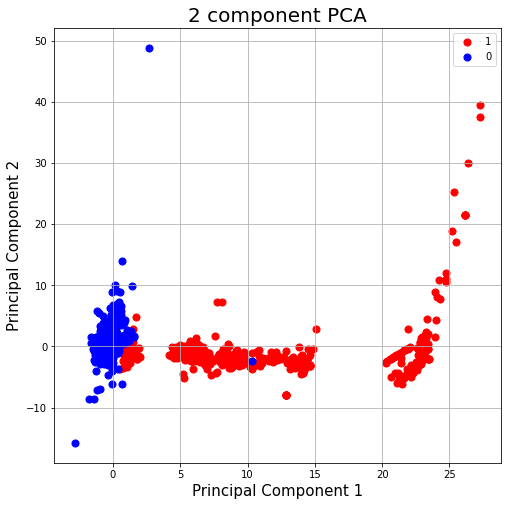

In [50]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
elapsed_time = time.time()
print(elapsed_time - start_time)

##### part ii 

In [51]:
start_time = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(finalDf)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10492 samples in 0.004s...
[t-SNE] Computed neighbors for 10492 samples in 0.190s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10492
[t-SNE] Computed conditional probabilities for sample 2000 / 10492
[t-SNE] Computed conditional probabilities for sample 3000 / 10492
[t-SNE] Computed conditional probabilities for sample 4000 / 10492
[t-SNE] Computed conditional probabilities for sample 5000 / 10492
[t-SNE] Computed conditional probabilities for sample 6000 / 10492
[t-SNE] Computed conditional probabilities for sample 7000 / 10492
[t-SNE] Computed conditional probabilities for sample 8000 / 10492
[t-SNE] Computed conditional probabilities for sample 9000 / 10492
[t-SNE] Computed conditional probabilities for sample 10000 / 10492
[t-SNE] Computed conditional probabilities for sample 10492 / 10492
[t-SNE] Mean sigma: 0.023158
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.397476
[t-SNE] KL

In [52]:
tsne_results[:,1]

array([ 11.297647 , -11.172515 ,  11.096838 , ..., -10.600686 ,
        -7.760653 ,   0.8790093], dtype=float32)

11.132148027420044


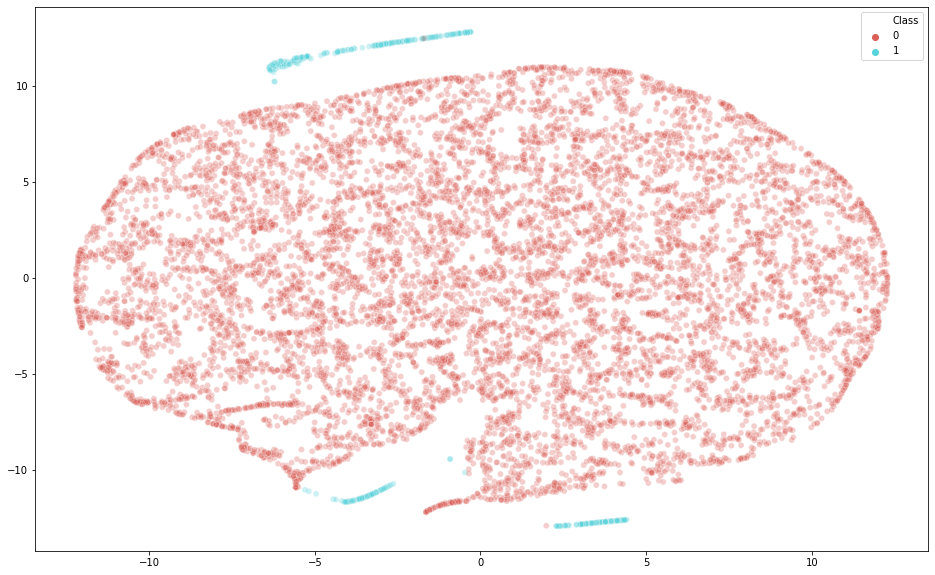

In [53]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue= "Class",
    palette=sns.color_palette("hls", 2),
    data=finalDf,
    legend="full",
    alpha=0.3 )
elapsed_time = time.time()
print(elapsed_time - start_time)

In [54]:
normalized = q2_df[['V1_Normalize', 'V2_Normalize',
       'V3_Normalize', 'V4_Normalize', 'V5_Normalize', 'V6_Normalize',
       'V7_Normalize', 'V8_Normalize', 'V9_Normalize', 'V10_Normalize',
       'V11_Normalize', 'V12_Normalize', 'V13_Normalize', 'V14_Normalize',
       'V15_Normalize', 'V16_Normalize', 'V17_Normalize', 'V18_Normalize',
       'V19_Normalize', 'V20_Normalize', 'V21_Normalize', 'V22_Normalize',
       'V23_Normalize', 'V24_Normalize', 'V25_Normalize', 'V26_Normalize',
       'V27_Normalize', 'V28_Normalize', "Amount_Normalize", "Time_Normalize", "Class_Normalize"]]

Fraudulent = normalized[normalized["Class_Normalize"] == 1]
Non_Fraudulent = normalized[normalized["Class_Normalize"] ==0]
sample_non_df = Non_Fraudulent.sample(n = 10000, random_state = 350)
q3_df = Fraudulent.append(sample_non_df)

In [55]:
q3_fraud = q3_df[q3_df['Class_Normalize'] == 1]
q3_fraud.reset_index(inplace = True)

In [56]:
q3_non_fraud = q3_df[q3_df['Class_Normalize'] == 0]
q3_non_fraud.reset_index(inplace = True)

### Question 3 Euclidean and Mannhatein distances

In [57]:
#q3_non_fraud.reset_index(inplace = True)
#q3_fraud.reset_index(inplace = True)

In [58]:
q3_fraud.drop("index", axis = 1, inplace = True)
q3_non_fraud.drop("index", axis = 1, inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [59]:
#q3_fraud = q3_fraud[['V3_Normalize',
#       'V10_Normalize', "V12_Normalize",
#       'V14_Normalize',  'V17_Normalize']] 
#q3_non_fraud = q3_non_fraud[['V3_Normalize',
#       'V10_Normalize', "V12_Normalize",
#       'V14_Normalize',  'V17_Normalize']]

In [60]:
q3_fraud = q3_fraud[['V3_Normalize', 'V10_Normalize','V12_Normalize', 'V14_Normalize','V17_Normalize']]
q3_non_fraud = q3_non_fraud[['V3_Normalize', 'V10_Normalize','V12_Normalize', 'V14_Normalize','V17_Normalize']]

In [61]:
q3_non_fraud = np.array(q3_non_fraud)
q3_fraud = np.array(q3_fraud)


In [62]:
from scipy.spatial import distance

start_time = time.time()
euc_non_fraud = distance.cdist(q3_fraud, q3_non_fraud, 'euclidean').mean()
elapsed_time = time.time()
print(elapsed_time - start_time)

start_time = time.time()
manh_non_fraud = distance.cdist(q3_fraud, q3_non_fraud, 'cityblock').mean()
elapsed_time = time.time()
print(elapsed_time - start_time)

0.03731679916381836
0.03553485870361328


In [63]:
start_time = time.time()
euc_fraud = distance.cdist(q3_fraud, q3_fraud, 'euclidean').mean()
elapsed_time = time.time()
print(elapsed_time - start_time)

start_time = time.time()
manh_fraud = distance.cdist(q3_fraud, q3_fraud, 'cityblock').mean()
elapsed_time = time.time()
print(elapsed_time - start_time)

0.0019779205322265625
0.0017261505126953125


In [64]:
distances_df = pd.DataFrame({"Distance":["Fraudulent and Non Fraudulent", "Fraudulent and Fraudulent"],
                               "Manhattan":[manh_non_fraud, manh_fraud], 
                              "Euclidian":[euc_non_fraud, euc_fraud]})
distances_df

,Distance,Manhattan,Euclidian
0,Fraudulent and Non Fraudulent,0.945178,0.465949
1,Fraudulent and Fraudulent,0.820738,0.420545


In [65]:
q3_df['Decile_Rank'] = pd.qcut(q3_df['Time_Normalize'], 10, 
                            labels = False)


### Question 4 Deciles

In [66]:
decile_df = pd.DataFrame({"Counts":["Fraudulent", "Non Fraudulent"],
                         "10%":[len(q3_df[(q3_df["Decile_Rank"]==0) & (q3_df["Class_Normalize"]==1)]), len(q3_df[(q3_df['Decile_Rank']==0) & (q3_df["Class_Normalize"]==0) ])], 
                         "20%":[len(q3_df[(q3_df["Decile_Rank"]==1) & (q3_df["Class_Normalize"]==1)]), len(q3_df[(q3_df['Decile_Rank']==1) & (q3_df["Class_Normalize"]==0) ])], 
                         "30%":[len(q3_df[(q3_df["Decile_Rank"]==2) & (q3_df["Class_Normalize"]==1)]), len(q3_df[(q3_df['Decile_Rank']==2) & (q3_df["Class_Normalize"]==0)])], 
                         "40%":[len(q3_df[(q3_df["Decile_Rank"]==3) & (q3_df["Class_Normalize"]==1)]), len(q3_df[(q3_df['Decile_Rank']==3) & (q3_df["Class_Normalize"]==0) ])], 
                         "50%":[len(q3_df[(q3_df["Decile_Rank"]==4) & (q3_df["Class_Normalize"]==1)]), len(q3_df[(q3_df['Decile_Rank']==4) & (q3_df["Class_Normalize"]==0) ])], 
                         "60%":[len(q3_df[(q3_df["Decile_Rank"]==5) & (q3_df["Class_Normalize"]==1)]), len(q3_df[(q3_df['Decile_Rank']==5) & (q3_df["Class_Normalize"]==0) ])], 
                         "70%":[len(q3_df[(q3_df["Decile_Rank"]==6) & (q3_df["Class_Normalize"]==1)]), len(q3_df[(q3_df['Decile_Rank']==6) & (q3_df["Class_Normalize"]==0) ])], 
                         "80%":[len(q3_df[(q3_df["Decile_Rank"]==7) & (q3_df["Class_Normalize"]==1)]), len(q3_df[(q3_df['Decile_Rank']==7) & (q3_df["Class_Normalize"]==0) ])], 
                         "90%":[len(q3_df[(q3_df["Decile_Rank"]==8) & (q3_df["Class_Normalize"]==1)]), len(q3_df[(q3_df['Decile_Rank']==8) & (q3_df["Class_Normalize"]==0) ])], 
                         "100%":[len(q3_df[(q3_df["Decile_Rank"]==9) & (q3_df["Class_Normalize"]==1)]), len(q3_df[(q3_df['Decile_Rank']==9) & (q3_df["Class_Normalize"]==0) ])]})
decile_df

,Counts,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%
0,Fraudulent,90,66,47,37,29,91,23,34,53,22
1,Non Fraudulent,960,983,1002,1012,1020,958,1026,1015,996,1028


In [67]:
q3_df['Decile_Rank_amount'] = pd.qcut(q3_df['Amount_Normalize'], 10, 
                            labels = False)


In [68]:
decile_df = pd.DataFrame({"Counts":["Fraudulent", "Non Fraudulent"],
                         "10%":[len(q3_df[(q3_df["Decile_Rank_amount"]==0) & (q3_df["Class_Normalize"]==1)]), len(q3_df[(q3_df['Decile_Rank_amount']==0) & (q3_df["Class_Normalize"]==0)])], 
                         "20%":[len(q3_df[(q3_df["Decile_Rank_amount"]==1) & (q3_df["Class_Normalize"]==1)]), len(q3_df[(q3_df['Decile_Rank_amount']==1 ) & (q3_df["Class_Normalize"]==0)])], 
                         "30%":[len(q3_df[(q3_df["Decile_Rank_amount"]==2) & (q3_df["Class_Normalize"]==1)]), len(q3_df[(q3_df['Decile_Rank_amount']==2 ) & (q3_df["Class_Normalize"]==0)])], 
                         "40%":[len(q3_df[(q3_df["Decile_Rank_amount"]==3) & (q3_df["Class_Normalize"]==1)]), len(q3_df[(q3_df['Decile_Rank_amount']==3 ) & (q3_df["Class_Normalize"]==0)])], 
                         "50%":[len(q3_df[(q3_df["Decile_Rank_amount"]==4) & (q3_df["Class_Normalize"]==1)]), len(q3_df[(q3_df['Decile_Rank_amount']==4 ) & (q3_df["Class_Normalize"]==0)])], 
                         "60%":[len(q3_df[(q3_df["Decile_Rank_amount"]==5) & (q3_df["Class_Normalize"]==1)]), len(q3_df[(q3_df['Decile_Rank_amount']==5 ) & (q3_df["Class_Normalize"]==0)])], 
                         "70%":[len(q3_df[(q3_df["Decile_Rank_amount"]==6) & (q3_df["Class_Normalize"]==1)]), len(q3_df[(q3_df['Decile_Rank_amount']==6 ) & (q3_df["Class_Normalize"]==0)])], 
                         "80%":[len(q3_df[(q3_df["Decile_Rank_amount"]==7) & (q3_df["Class_Normalize"]==1)]), len(q3_df[(q3_df['Decile_Rank_amount']==7 ) & (q3_df["Class_Normalize"]==0)])], 
                         "90%":[len(q3_df[(q3_df["Decile_Rank_amount"]==8) & (q3_df["Class_Normalize"]==1)]), len(q3_df[(q3_df['Decile_Rank_amount']==8 ) & (q3_df["Class_Normalize"]==0)])], 
                         "100%":[len(q3_df[(q3_df["Decile_Rank_amount"]==9) & (q3_df["Class_Normalize"]==1)]), len(q3_df[(q3_df['Decile_Rank_amount']==9) & (q3_df["Class_Normalize"]==0) ])]})
decile_df

,Counts,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%
0,Fraudulent,181,25,35,16,14,17,24,52,46,82
1,Non Fraudulent,1056,840,1011,1033,1035,1038,1024,992,1006,965


## Part II: Clustering and Classification

### Question 5 Kmeans++

In [69]:
import sklearn 
from sklearn.cluster import KMeans
import matplotlib.pyplot
from sklearn import metrics


selected = q3_df[['V3_Normalize','V10_Normalize', "V12_Normalize",'V14_Normalize',  'V17_Normalize']].values
y = q3_df["Class_Normalize"].values

start_time = time.time()
kmeans = KMeans(n_clusters = 2,random_state = 350,  init = "k-means++")
kmeans_fit = kmeans.fit(selected)
labels1 = kmeans_fit.labels_
elapsed_time = time.time()
print(elapsed_time - start_time)

calinski = []
silh_score = []
precision = []
f1score = []
recall = []


calinski.append(metrics.calinski_harabasz_score(selected, labels1))
silh_score.append(metrics.silhouette_score(selected, labels1))
precision.append(metrics.precision_score(y, labels1))
f1score.append(metrics.f1_score(y, labels1))
recall.append(metrics.recall_score(y, labels1))

0.04619598388671875


### Question 6 DBSCAN

In [70]:
from sklearn.cluster import DBSCAN
euc_non_fraud = 0.335
start_time = time.time()
clustering = DBSCAN(eps=euc_non_fraud, min_samples=10)
clustering_fit = clustering.fit(selected)
labels2 = clustering_fit.labels_
elapsed_time = time.time()
print(elapsed_time - start_time)


calinski.append(metrics.calinski_harabasz_score(selected, labels2))
silh_score.append(metrics.silhouette_score(selected, labels2))
precision.append(metrics.precision_score(y, labels2, average = "weighted")) ### average thing
f1score.append(metrics.f1_score(y, labels2, average = "weighted"))
recall.append(metrics.recall_score(y, labels2 ,average = "weighted"))

1.7317368984222412


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Question 7 logistic regression and zero-inflated

In [71]:
from sklearn.linear_model import LogisticRegression

selected = q3_df[['Time_Normalize', 'V1_Normalize', 'V2_Normalize',
       'V3_Normalize', 'V4_Normalize', 'V5_Normalize', 'V6_Normalize',
       'V7_Normalize', 'V8_Normalize', 'V9_Normalize', 'V10_Normalize',
       'V11_Normalize', 'V12_Normalize', 'V13_Normalize', 'V14_Normalize',
       'V15_Normalize', 'V16_Normalize', 'V17_Normalize', 'V18_Normalize',
       'V19_Normalize', 'V20_Normalize', 'V21_Normalize', 'V22_Normalize',
       'V23_Normalize', 'V24_Normalize', 'V25_Normalize', 'V26_Normalize',
       'V27_Normalize', 'V28_Normalize', 'Amount_Normalize']]
y = q3_df['Class_Normalize'].values

start_time = time.time()
clf = LogisticRegression(random_state=350)
clf_fit = clf.fit(selected, y)
clf_fit.predict_proba(selected)
y_pred3 = clf_fit.predict(selected)

elapsed_time = time.time()
print(elapsed_time - start_time)

0.050163984298706055


In [72]:
calinski.append(metrics.calinski_harabasz_score(selected, y_pred3))
silh_score.append(metrics.silhouette_score(selected, y_pred3))
precision.append(metrics.precision_score(y, y_pred3))
f1score.append(metrics.f1_score(y, y_pred3))
recall.append(metrics.recall_score(y, y_pred3))

In [73]:
normalized = creditdf[['Time_Normalize', 'V1_Normalize', 'V2_Normalize',
       'V3_Normalize', 'V4_Normalize', 'V5_Normalize', 'V6_Normalize',
       'V7_Normalize', 'V8_Normalize', 'V9_Normalize', 'V10_Normalize',
       'V11_Normalize', 'V12_Normalize', 'V13_Normalize', 'V14_Normalize',
       'V15_Normalize', 'V16_Normalize', 'V17_Normalize', 'V18_Normalize',
       'V19_Normalize', 'V20_Normalize', 'V21_Normalize', 'V22_Normalize',
       'V23_Normalize', 'V24_Normalize', 'V25_Normalize', 'V26_Normalize',
       'V27_Normalize', 'V28_Normalize', 'Amount_Normalize', "Class_Normalize"]]
Fraudulent = normalized[normalized["Class_Normalize"] == 1]
Non_Fraudulent = normalized[normalized["Class_Normalize"] ==0]
sample_non_df = Non_Fraudulent.sample(n = 10000, random_state = 350)
q3_df = Fraudulent.append(sample_non_df)

In [74]:
import math as math
from scipy import stats
import statsmodels.discrete.count_model as reg_models

start_time = time.time()
out=reg_models.ZeroInflatedPoisson(y,selected,exog_infl = selected, inflation='logit')
fit_regularized=out.fit_regularized(maxiter = 1000)

fit=out.fit(method='lbfgs', maxiter = 1000)


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.10855786387471443
            Iterations: 217
            Function evaluations: 217
            Gradient evaluations: 217


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [75]:
y_test_pred = fit.predict(selected, exog_infl=selected)
elapsed_time = time.time()
print(elapsed_time - start_time)

12.17362904548645


In [76]:
test4 = []
for num in y_test_pred:
    if num <0.5:
        num = 0
    else:
        num = 1
    test4.append(num)

In [77]:
calinski.append(metrics.calinski_harabasz_score(selected, test4))
silh_score.append(metrics.silhouette_score(selected, test4))  
precision.append(metrics.precision_score(y, test4))  #weighted?
f1score.append(metrics.f1_score(y, test4))
recall.append(metrics.recall_score(y, test4))

In [78]:
names = ["Kmeans++",
"DBSCAN",
"Zero-inflated",
"Logistic regression"]

pd.DataFrame({"Type":names,"Calinski-Harabasz":calinski, "Silhouette Score": silh_score, "Precision Score": precision, "F1 Score":f1score, "Recall Score": recall })

,Type,Calinski-Harabasz,Silhouette Score,Precision Score,F1 Score,Recall Score
0,Kmeans++,14998.695153,0.855760,0.996599,0.745547,0.595528
1,DBSCAN,20.124914,0.820885,0.908409,0.930176,0.953012
2,Zero-inflated,1456.658680,0.491625,0.989501,0.863688,0.766260
3,Logistic regression,1331.368592,0.463737,0.962963,0.900433,0.845528


### Question 8  Kmeans

In [79]:
start_time = time.time()
kmeans_byhand = KMeans(init = 'random', random_state = 350).fit(selected)
labels = kmeans_byhand.labels_
elapsed_time = time.time()
print(elapsed_time - start_time)

0.2996540069580078


In [80]:
print(metrics.calinski_harabasz_score(selected, labels))
print(metrics.silhouette_score(selected, labels))
print(metrics.precision_score(y, labels, average = "weighted")) ###ask 
print(metrics.f1_score(y, labels, average = "weighted"))
print(metrics.recall_score(y, labels, average = "weighted"))

2631.663195698793
0.12522524504320062
0.0011326780376491128
0.0010351627099044873
0.0009531071292413268


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Part III Ensemble Learning

### Question 9 Max-Voting i

In [81]:
from scipy import stats
print("Kmeans mode", int(stats.mode(labels1)[0]))
print("DBSCAN mode", int(stats.mode(labels2)[0]))
print("Zero-Inflated mode", int(stats.mode(y_pred3)[0]))
print("Logistic mode",int(stats.mode(test4)[0]))

Kmeans mode 0
DBSCAN mode 0
Zero-Inflated mode 0
Logistic mode 0


In [82]:
test4 = np.array(test4)

### Question 9 ii

In [83]:
from sklearn.model_selection import train_test_split
y_pred3 =  y_pred3.astype(int)

X = pd.DataFrame({"Kmeans++" : labels1, "DBSCAN": labels2, "Logistic": y_pred3, "Poss": test4})

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
pred = clf.predict(X)


print(clf.score(X, y))
print(metrics.calinski_harabasz_score(X, y))
print(metrics.silhouette_score(X, y))
print(metrics.precision_score(y, pred)) ###ask 
print(metrics.f1_score(y, pred))
print(metrics.recall_score(y, pred))


0.9912314144109798
27769.471815436547
0.9644705312005457
0.9629629629629629
0.9004329004329005
0.8455284552845529


## Part IV 
### Question 10

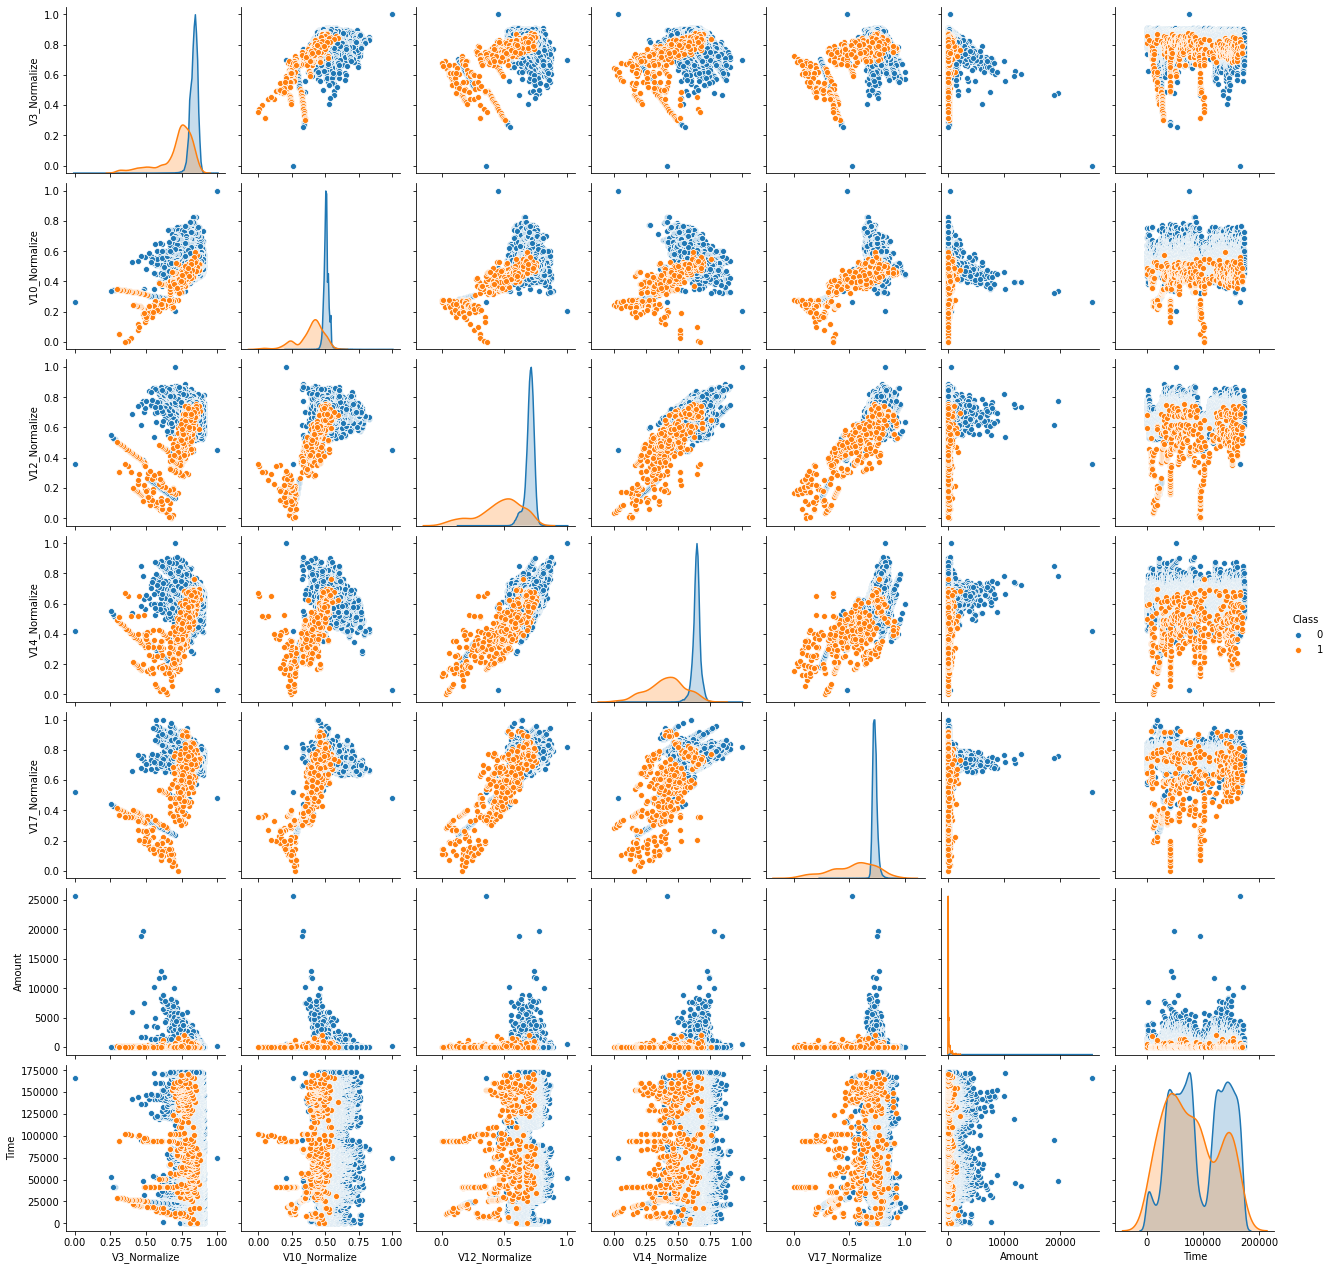

In [84]:
import seaborn as sns
filtered = creditdf[['V3_Normalize','V10_Normalize', "V12_Normalize",'V14_Normalize',  'V17_Normalize', "Class", "Amount", "Time"]]
sns.pairplot(filtered, hue="Class")

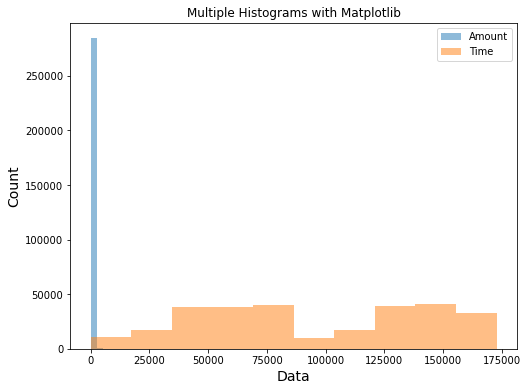

In [85]:
import matplotlib.pyplot as plt
amount = creditdf["Amount"]
time = creditdf["Time"]
plt.figure(figsize=(8,6))
plt.hist(amount,  alpha=0.5, label="Amount")
plt.hist(time, alpha=0.5, label="Time")

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper right')
plt.show()